In [1]:
using Plots
using LinearAlgebra
using Random

In [2]:
# Birds chirping data
# http://www.cs.cornell.edu/~bindel/class/sjtu-summer18/lec/2018-06-13.pdf
# http://mste.illinois.edu/

# bird chirps per 15 seconds
chirp_cnts = [20, 16, 20, 18, 17, 16, 15, 17, 15, 16, 15, 17, 16, 17, 14]  
# temperatures (F)
temps = [89, 72, 93, 84, 81, 75, 70, 82, 69, 83, 80, 83, 81, 84, 76] 
b = temps;  # alias to match lecture notes

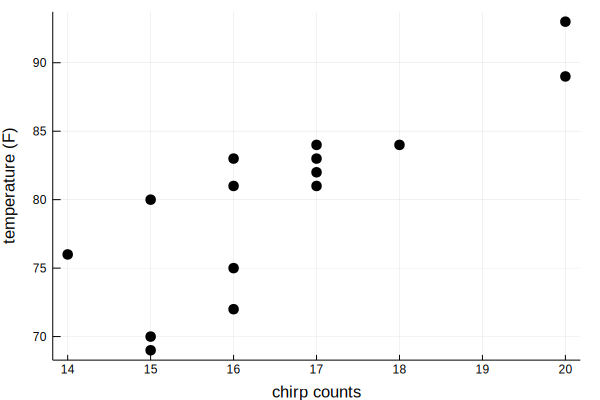

In [3]:
scatter(chirp_cnts, temps, 
        xlabel="chirp counts", ylabel="temperature (F)", 
        markersize=5, color=:black, label="")

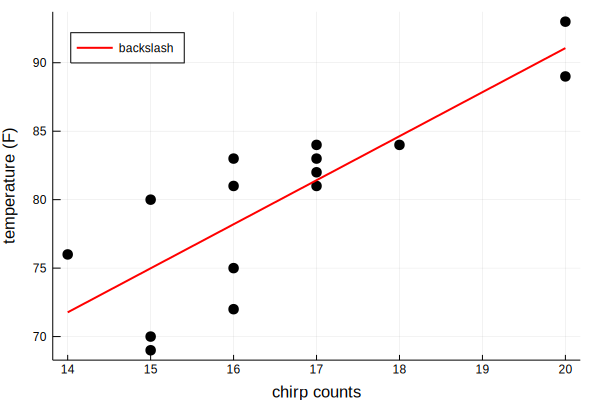

In [4]:
A = [chirp_cnts ones(length(chirp_cnts))]
x_backslash = A \ b
plot!(chirp_cnts, A * x_backslash, lw=2, color="red", label="backslash", legend=:topleft)

In [5]:
r = A * x_backslash - temps;
norm(r' * A, 2)

1.1529339209828293e-11

In [6]:
# Cholesky
L = cholesky(A' * A).U'
x_chol = L' \ (L \ (A' * b))

2-element Array{Float64,1}:
  3.2163461538461067
 26.741987179487968 

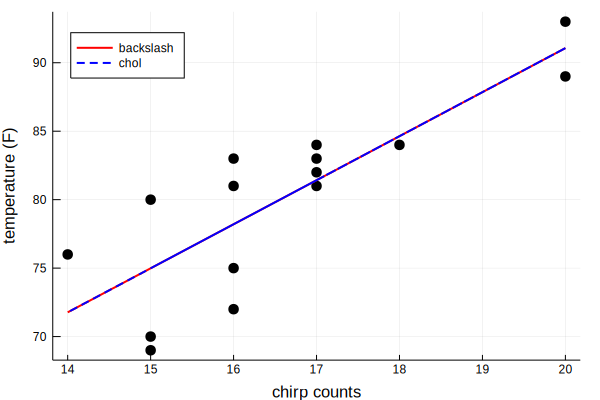

In [7]:
plot!(chirp_cnts, A * x_chol, lw=2, ls=:dash, color="blue", label="chol", legend=:topleft)

In [8]:
Q, R = qr(A)
# R^T = L up to sign
R', L

([-64.6142 0.0; -3.85364 -0.386602], [64.6142 0.0; 3.85364 0.386602])

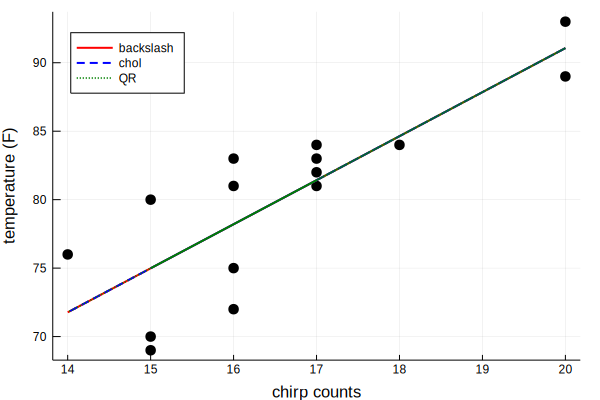

In [9]:
x_qr = R \ (Matrix(Q)' * b)
plot!(chirp_cnts, A * x_qr, lw=2, ls=:dot, color="green", label="QR", legend=:topleft)

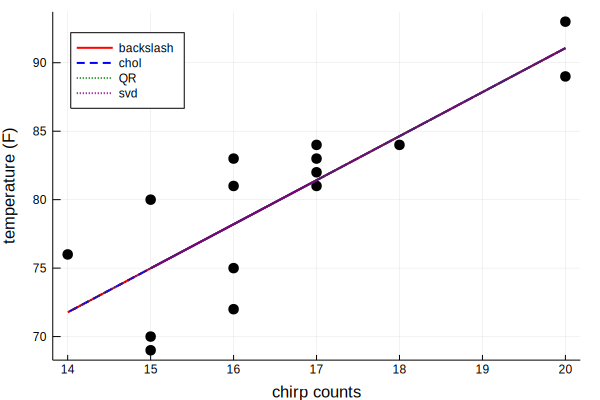

In [10]:
U, Σ, V = svd(A)
x_svd = V * (Diagonal(Σ) \ (U' * b))
plot!(chirp_cnts, A * x_svd, lw=2, ls=:dot, color="purple", label="svd", legend=:topleft)

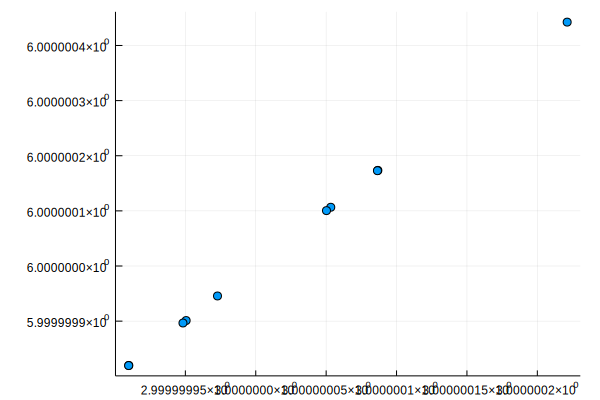

In [11]:
# Example data
Random.seed!(1234)  # determinism
n = 10
feats = 3 * ones(n) + 1e-7 * randn(n)
b = 2 * feats
scatter(feats, b, label="")

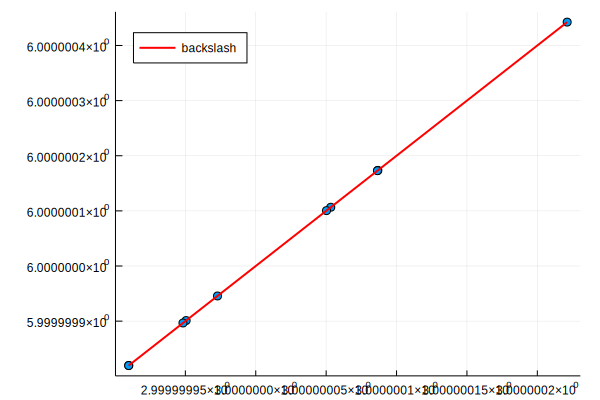

In [12]:
A = [feats ones(n)]
x_backslash = A \ b
A * x_backslash
plot!(feats, A * x_backslash, lw=2, color="red", label="backslash", legend=:topleft)

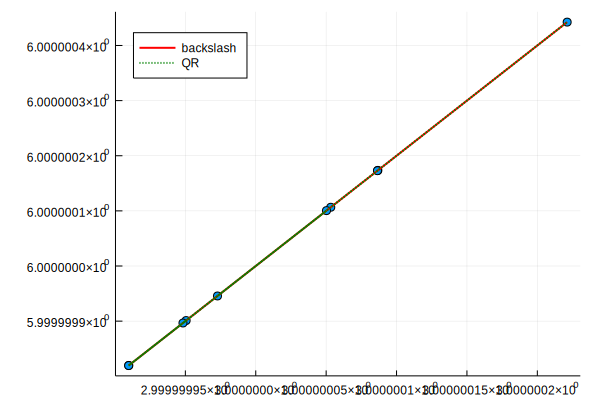

In [13]:
Q, R = qr(A)
x_qr = R \ (Matrix(Q)' * b)
plot!(feats, A * x_qr, lw=2, ls=:dot, color="green", label="QR", legend=:topleft)

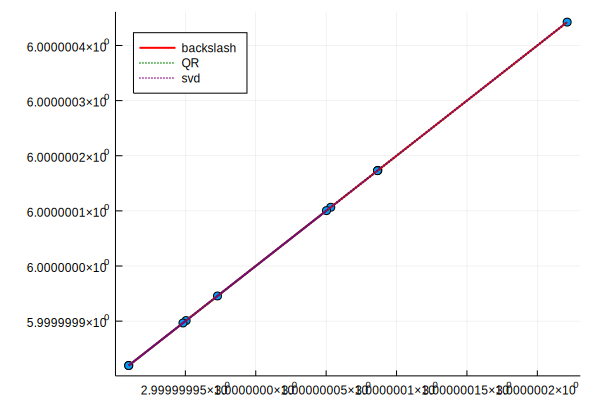

In [14]:
U, Σ, V = svd(A)
x_svd = V * (Diagonal(Σ) \ (U' * b))
plot!(feats, A * x_svd, lw=2, ls=:dot, color="purple", label="svd")

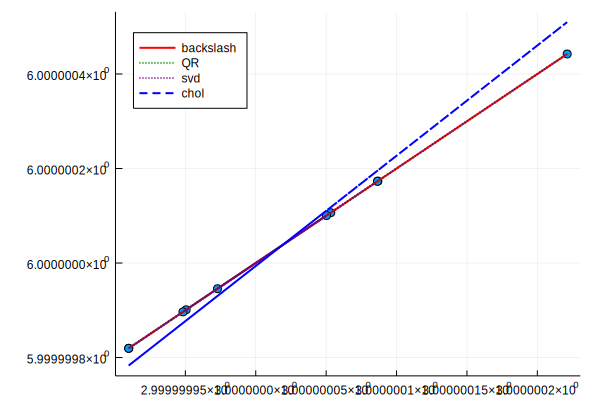

In [15]:
L = cholesky(A' * A).U'
x_chol = L' \ (L \ (A' * b))
plot!(feats, A * x_chol, lw=2, ls=:dash, color="blue", label="chol", legend=:topleft)

In [16]:
# inherent ill conditioning
norm(pinv(A), 2)

1.0669391909823762e7